# Visualizing FITS Astronomy Data | Astronomy Research Data Analysis

---

### 1) Installing Astroquery

In [ ]:
!pip install astroquery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 909.7/909.7 kB 18.5 MB/s eta 0:00:00


### 2) Import necessary Libraries and Modules

In [ ]:
import matplotlib.pyplot as plt

### 3) Query for Astronomical Survey Images centered on target name

SkyView Query Form:- https://skyview.gsfc.nasa.gov/current/cgi/query.pl

<img src='http://www.messier-objects.com/wp-content/uploads/2015/04/Messier-32-Messier-31-and-Messier-110.jpg' width = 50%>

In [ ]:
from astroquery.skyview import SkyView

In [ ]:

hdu = SkyView.get_images("M31", "SDSSg")[0][0]

In [ ]:
hdu

### 4) Get into the data

In [ ]:
M31_header = hdu.header


In [ ]:
M31_Pixels = hdu.data

In [ ]:
type(M31_Pixels)

numpy.ndarray

In [ ]:
M31_Pixels.shape

(300, 300)

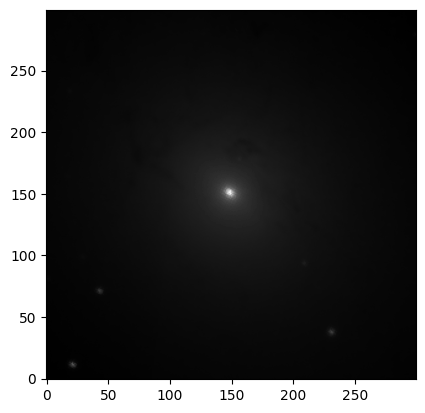

In [ ]:
plt.imshow(M31_Pixels, cmap='gray', origin='lower')

In [ ]:
import astropy.units as u

In [ ]:
hdu = SkyView.get_images("M31", "DSS2 Blue",
                         pixels=600,
                         radius=150*u.arcmin)[0][0]

In [ ]:
M31_DSS2_Blue_Pixels = hdu.data

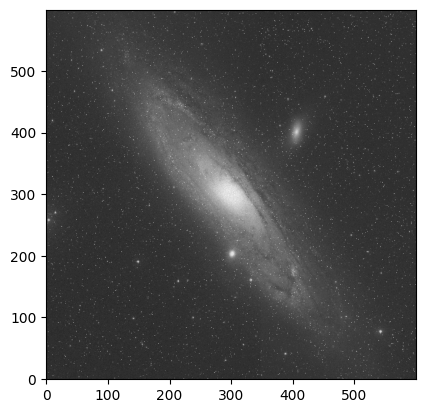

In [ ]:
plt.imshow(M31_DSS2_Blue_Pixels, cmap='gray', origin='lower')

### 5) Learn to create your own FITS file

In [ ]:

from astropy.io import fits

In [ ]:
'''Steps to prepare data for FITS file'''

hdulist = fits.HDUList()


hdu1 = fits.PrimaryHDU()

hdu1.data = M31_Pixels


hdu1.header = M31_header

hdulist.append(hdu1)


hdulist.writeto('Dummy_FITS_file.fits')

* Like this you can add as many HDU (different types) to create your own complete fits file!


In [ ]:

My_fits = fits.open('/content/Dummy_FITS_file.fits')

In [ ]:

My_fits

In [ ]:

My_fits[0]

In [ ]:

My_fits[0].header

SIMPLE  =                    T / Written by SkyView Wed Dec 20 06:30:46 EST 2023
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  300 / Width of image                                 
NAXIS2  =                  300 / Height of image                                
CRVAL1  =              10.6847 / Reference longitude                            
CRVAL2  =              41.2688 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150

In [ ]:
My_fits[0].data

array([[5.4453125, 5.453125 , 5.4453125, ..., 7.4609375, 7.515625 ,
        7.4140625],
       [5.4375   , 5.453125 , 5.421875 , ..., 7.625    , 7.4453125,
        7.4453125],
       [5.4765625, 5.359375 , 5.4609375, ..., 7.4375   , 7.5625   ,
        7.46875  ],
       ...,
       [7.3984375, 7.3984375, 7.546875 , ..., 5.53125  , 5.671875 ,
        5.7578125],
       [7.46875  , 7.6171875, 7.5859375, ..., 5.6640625, 5.671875 ,
        5.5625   ],
       [7.53125  , 7.5078125, 7.5859375, ..., 5.53125  , 5.59375  ,
        5.5546875]], dtype=float32)

In [ ]:
dummy_data_var = My_fits[0].data

In [ ]:
dummy_data_var.shape

(300, 300)

In [ ]:
type(dummy_data_var)

numpy.ndarray

##  Pixel Scaling on M31 Data

In [ ]:
import numpy as np

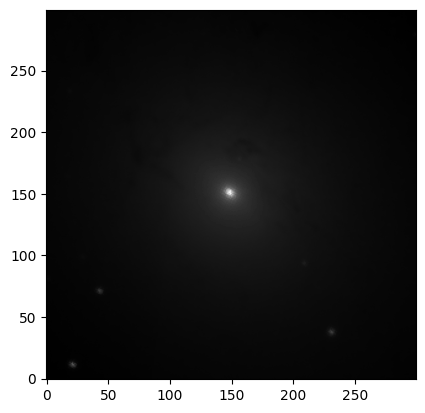

In [ ]:
plt.imshow(M31_Pixels, cmap='gray', origin='lower')

In [ ]:
M31_Pixels[151, 151]

126.5

In [ ]:
print('Sumarray Statistics of M31 Pixels:-')
print(f'Minimum:- {np.min(M31_Pixels)}')
print(f'Maximum:- {np.max(M31_Pixels)}')
print(f'Average:- {np.mean(M31_Pixels)}')
print(f'Std:- {np.std(M31_Pixels)}')

Sumarray Statistics of M31 Pixels:-
Minimum:- 5.359375
Maximum:- 178.0
Average:- 13.329444885253906
Std:- 6.3922271728515625


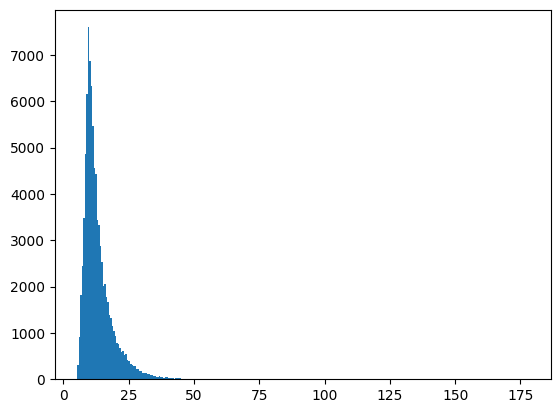

In [ ]:
plt.hist(M31_Pixels.flat, bins=300)
plt.show()


### 1) Intensity Normalization Or Linear Scaling Or Min Max Scaling

<img src='https://playfairdata.com/wp-content/uploads/2022/05/6.-minmax-calc.png' width=25%>

In [ ]:
def plot_pixels(pixel_array, title, color):
  plt.imshow(pixel_array, cmap='gray', origin='lower')
  plt.title(title, color=color, weight='bold')
  plt.axis('off')

In [ ]:
def compare_pixels(scaled_array, title):
  plt.subplot(1, 2, 1)
  plot_pixels(M31_Pixels, title='Original Image', color='black')
  plt.subplot(1, 2, 2)
  plot_pixels(scaled_array, title=title, color='royalblue')
  plt.tight_layout()
  plt.show()

In [ ]:
def minmax_scaling(pixel_array):
  num = pixel_array - np.min(pixel_array)
  den = np.max(pixel_array) - np.min(pixel_array)
  return num/den

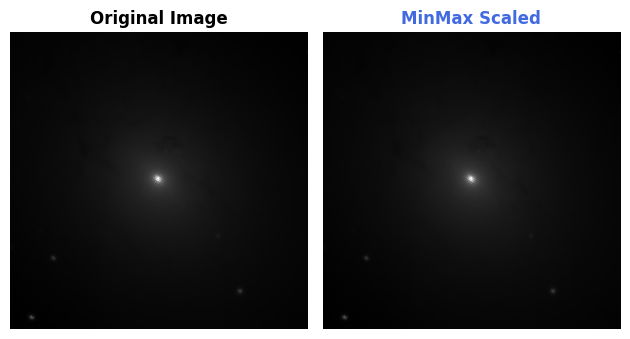

In [ ]:
minmax_array = minmax_scaling(M31_Pixels)
compare_pixels(minmax_array, title='MinMax Scaled')

In [ ]:
def zscale(pixel_array):
  num = pixel_array - np.mean(pixel_array)
  den = np.std(pixel_array)
  return num/den

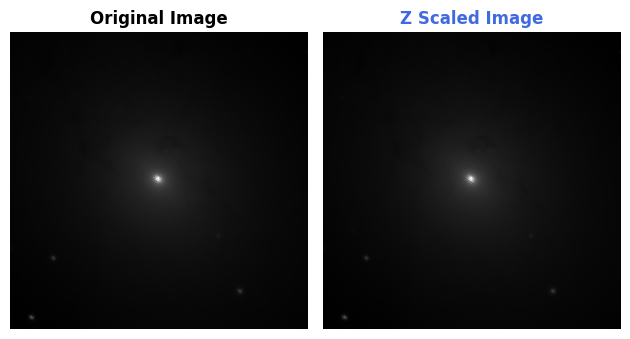

In [ ]:
zscaled_array = zscale(M31_Pixels)
compare_pixels(zscaled_array, title='Z Scaled Image')


### 3) Log Normalization

In [ ]:
def log_normalization(pixel_array):
  return np.log(pixel_array)

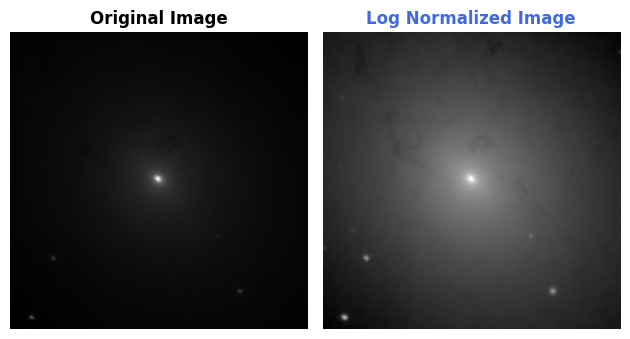

In [ ]:
log_norm_array = log_normalization(M31_Pixels)
compare_pixels(log_norm_array, title='Log Normalized Image')


### 4) Create a Histogram Distribution of Pixels of the best output so far!

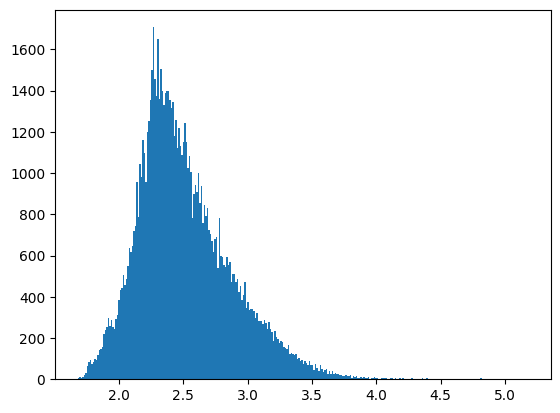

In [ ]:
plt.hist(log_norm_array.flat, bins=300)
plt.show()

In [ ]:
log_norm_array.shape

(300, 300)

## 5) Square Root


In [ ]:
def sqrt_scaling(pixel_array):
  return np.sqrt(pixel_array)

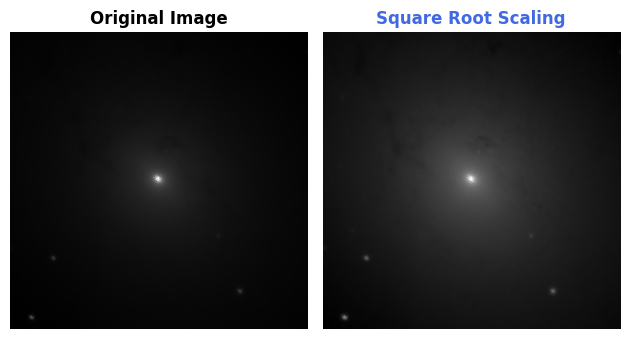

In [ ]:
sqrt_array = sqrt_scaling(M31_Pixels)
compare_pixels(sqrt_array, title='Square Root Scaling')

#astropy.visualization Modules

### ZScaleInterval

In [ ]:
from astropy.visualization import ZScaleInterval

In [ ]:
z = ZScaleInterval()

In [ ]:
z1, z2 = z.get_limits(log_norm_array)

In [ ]:
print(f'Minimum = {z1}')
print(f'Maximum = {z2}')

Minimum = 1.6889997720718384
Maximum = 4.447910199027213


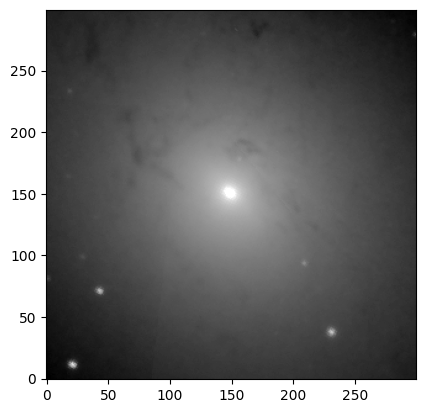

In [ ]:
img = plt.imshow(log_norm_array, vmin=z1, vmax=z2, cmap='gray', origin='lower')
plt.show()

In [ ]:
image_array = img.make_image(renderer=None, unsampled=True)[0]

In [ ]:
image_array.shape

(300, 300, 4)

**Note:-**
* Red, Green, Blue and Alpha channels makes up a 4 channel image

### Change 4 channel image to  grayscale

In [ ]:
import cv2

In [ ]:
gray_array = cv2.cvtColor(image_array, cv2.COLOR_BGRA2GRAY)

In [ ]:
gray_array.shape

(300, 300)

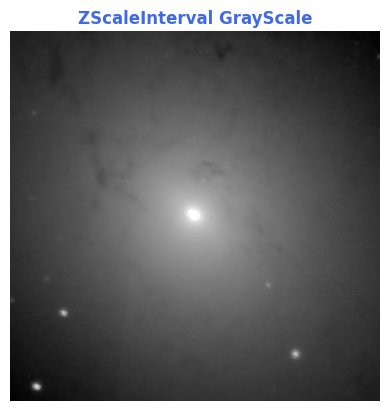

In [ ]:
plot_pixels(gray_array, title='ZScaleInterval GrayScale', color='royalblue')

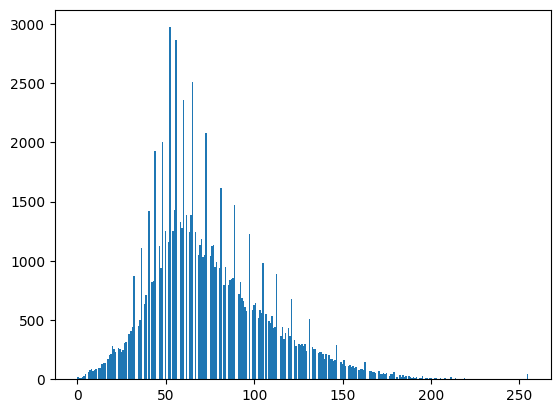

In [ ]:
plt.hist(gray_array.flat, bins=300)
plt.show()

In [ ]:
grayscale_zint_array = gray_array